In [2]:
from func_def import *

In [3]:
df = pd.read_csv('data_pre_processed.csv',index_col=[0]).reset_index(drop=True)
df.tail(3)

,url,event_url,result,fighter,opponent,title,method,round,time,format,f_head_sig_str,f_body_sig_str,f_leg_sig_str,f_distance_sig_str,f_clinch_sig_str,f_ground_sig_str,o_head_sig_str,o_body_sig_str,o_leg_sig_str,o_distance_sig_str,o_clinch_sig_str,o_ground_sig_str,f_sig_str_head,f_sig_str_body,f_sig_str_leg,f_sig_str_dist,f_sig_str_clinch,f_sig_str_ground,o_sig_str_head,o_sig_str_body,o_sig_str_leg,o_sig_str_dist,o_sig_str_clinch,o_sig_str_ground,date
7216,http://www.ufcstats.com/fight-details/e3a5a7ed...,http://www.ufcstats.com/event-details/ef61d9f5...,W,Nora Cornoll,Joselyne Edwards,Women's Bantamweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),12of37,17of24,11of16,17of39,23of38,0of0,6of20,8of9,4of13,14of35,4of6,0of1,30%,42%,27%,42%,57%,0%,33%,44%,22%,77%,22%,0%,2023-09-02 00:00:00
7217,http://www.ufcstats.com/fight-details/ac73c688...,http://www.ufcstats.com/event-details/ef61d9f5...,W,Farid Basharat,Kleydson Rodrigues,Bantamweight Bout,Submission,1,4:15,3 Rnd (5-5-5),2of3,2of2,0of1,0of1,1of1,3of4,3of4,2of2,2of2,4of5,1of1,2of2,50%,50%,0%,0%,25%,75%,42%,28%,28%,57%,14%,28%,2023-09-02 00:00:00
7218,http://www.ufcstats.com/fight-details/2a48d0a9...,http://www.ufcstats.com/event-details/ef61d9f5...,L,Zarah Fairn,Jacqueline Cavalcant,Catch Weight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),25of241,8of12,6of6,39of258,0of1,0of0,43of127,20of22,63of72,116of209,10of12,0of0,64%,20%,15%,100%,0%,0%,34%,15%,50%,92%,7%,0%,2023-09-02 00:00:00


In [11]:
FEATURES = ['head_sig_str','body_sig_str']
feature_columns = [f'f_{item}' for item in FEATURES] + [f'o_{item}' for item in FEATURES]
feature_columns

['f_head_sig_str', 'f_body_sig_str', 'o_head_sig_str', 'o_body_sig_str']

In [22]:
FEATURES = ['head_sig_str','body_sig_str']
feature_columns = [f'f_{item}' for item in FEATURES] + [f'o_{item}' for item in FEATURES]

data = df[['date','fighter','opponent','result'] + feature_columns].copy()

for prefix in ['f_','o_']:
    for feature in FEATURES:
        data[f'{prefix}{feature}'] = [int(item.split('of')[0]) for item in df[f'{prefix}{feature}']]
        data[f'{prefix}{feature}_att'] = [int(item.split('of')[1]) for item in df[f'{prefix}{feature}']]

data.tail(3)

,date,fighter,opponent,result,f_head_sig_str,f_body_sig_str,o_head_sig_str,o_body_sig_str,f_head_sig_str_att,f_body_sig_str_att,o_head_sig_str_att,o_body_sig_str_att
7216,2023-09-02 00:00:00,Nora Cornoll,Joselyne Edwards,W,12,17,6,8,37,24,20,9
7217,2023-09-02 00:00:00,Farid Basharat,Kleydson Rodrigues,W,2,2,3,2,3,2,4,2
7218,2023-09-02 00:00:00,Zarah Fairn,Jacqueline Cavalcant,L,25,8,43,20,241,12,127,22


In [24]:
STATS = [item for item in FEATURES] + [f'{item}_att' for item in FEATURES]
for stat in STATS:
    for index in tqdm(data.index):
        data.loc[index,f'f_{stat}_mean'] = get_mean_stat(fighter=data.loc[index,'fighter'],stat_col=f'f_{stat}',time=data.loc[index,'date'],data=data)
        data.loc[index,f'o_{stat}_mean'] = get_mean_stat(fighter=data.loc[index,'opponent'],stat_col=f'o_{stat}',time=data.loc[index,'date'],data=data)

data.tail(3)

100%|██████████| 7219/7219 [00:59<00:00, 120.79it/s]


,date,fighter,opponent,result,f_head_sig_str,f_body_sig_str,o_head_sig_str,o_body_sig_str,f_head_sig_str_att,f_body_sig_str_att,o_head_sig_str_att,o_body_sig_str_att,f_head_sig_str_mean,o_head_sig_str_mean,f_body_sig_str_mean,o_body_sig_str_mean,f_head_sig_str_att_mean,o_head_sig_str_att_mean,f_body_sig_str_att_mean,o_body_sig_str_att_mean
7216,2023-09-02 00:00:00,Nora Cornoll,Joselyne Edwards,W,12,17,6,8,37,24,20,9,0.000000,26.166667,0.0,27.0,0.0,71.333333,0.0,45.666667
7217,2023-09-02 00:00:00,Farid Basharat,Kleydson Rodrigues,W,2,2,3,2,3,2,4,2,36.000000,23.500000,14.0,17.5,70.0,53.500000,17.0,21.500000
7218,2023-09-02 00:00:00,Zarah Fairn,Jacqueline Cavalcant,L,25,8,43,20,241,12,127,22,34.333333,0.000000,6.0,0.0,84.0,0.000000,7.0,0.000000


<Axes: xlabel='head_str_mean_att_dif', ylabel='head_str_mean_dif'>

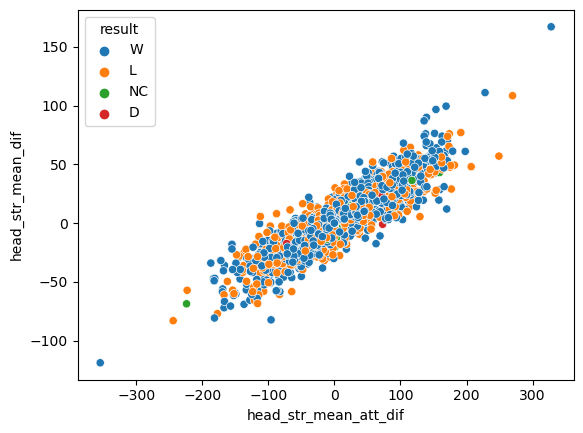

In [7]:
data['head_str_mean_dif'] = data['f_head_str_mean'] - data['o_head_str_mean']
data['head_str_mean_att_dif'] = data['f_head_str_att_mean'] - data['o_head_str_att_mean']
sns.scatterplot(data=data,x='head_str_mean_att_dif',y='head_str_mean_dif',hue='result')

<Axes: xlabel='body_sig_str_mean_att_dif', ylabel='body_sig_str_mean_dif'>

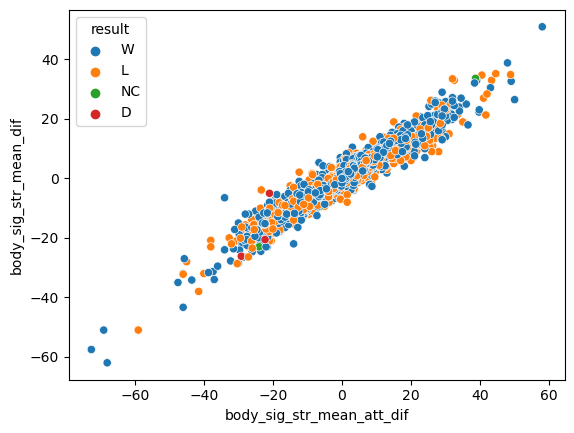

In [28]:
data['body_sig_str_mean_dif'] = data['f_body_sig_str_mean'] - data['o_body_sig_str_mean']
data['body_sig_str_mean_att_dif'] = data['f_body_sig_str_att_mean'] - data['o_body_sig_str_att_mean']
sns.scatterplot(data=data,x='body_sig_str_mean_att_dif',y='body_sig_str_mean_dif',hue='result')

<Axes: xlabel='result', ylabel='head_str_mean_dif'>

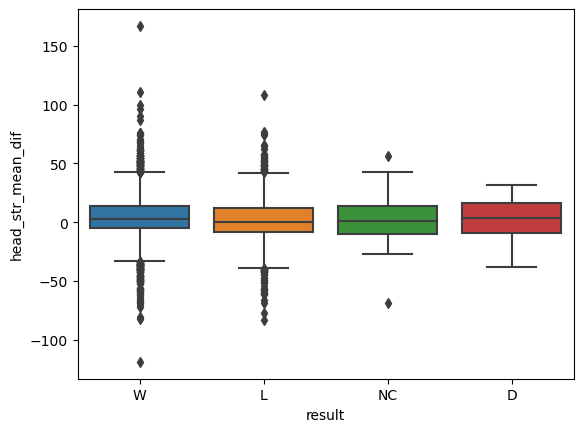

In [10]:
data['head_str_mean_dif'] = data['f_head_str_mean'] - data['o_head_str_mean']
sns.boxplot(data=data,x='result',y='head_str_mean_dif')

In [4]:
get_mean_stat(fighter='Max Holloway',stat_col='f_head_str',time='2013-08-17',data=data)

48.8

In [ ]:
get_mean_stat(fighter='Max Holloway',stat_col='f_head_str',time='2013-08-17',data=data)

,date,opponent,o_head_str
2603,2012-08-11,Max Holloway,18
5120,2013-05-25,Max Holloway,64
5442,2012-12-29,Max Holloway,68
6896,2012-02-04,Max Holloway,8


In [6]:
X = ['head_str_dif','head_str_att_dif']
y = 'result'

In [9]:
set_train_test(X_columns=X, y_columns=y, data=data, test_size=0.3, valid_size=0)
data

Data split: Data=(7196, 6), train_set=(5109, 2), validation_set=(0, 2), test_set=(2087, 2)


,set,fighter,opponent,result,head_str_dif,head_str_att_dif
0,train,Max Holloway,Chan Sung Jung,W,9,-33
1,test,Anthony Smith,Ryan Spann,W,5,-66
2,test,Giga Chikadze,Alex Caceres,W,0,-27
3,train,Rinya Nakamura,Fernie Garci,W,7,-22
4,train,Erin Blanchfield,Taila Santo,W,9,-19
...,...,...,...,...,...,...
7191,train,Tyson Griffi,Thiago Tavare,W,14,35
7192,test,Rich Clementi,Anthony Johnson,W,-6,-23
7193,train,Jeremy Stephens,Diego Saraiva,W,31,53
7194,train,Christian Wellisch,Scott Jun,W,-8,-13


<Axes: xlabel='result', ylabel='head_str_dif'>

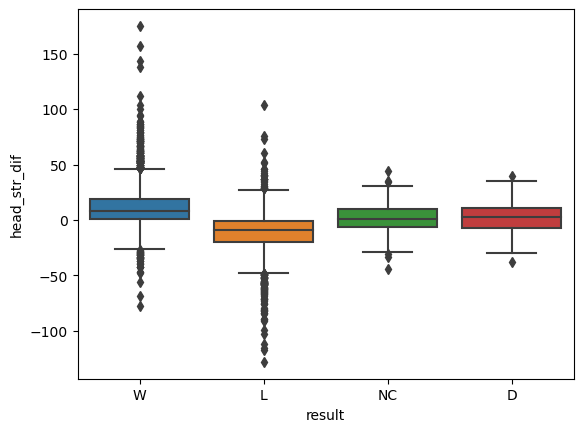

In [5]:
sns.boxplot(x='result',y='head_str_dif',data=data)

<Axes: xlabel='head_str_att_dif', ylabel='head_str_dif'>

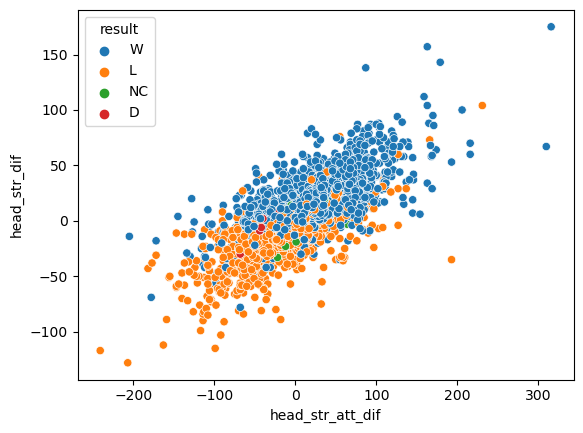

In [6]:
sns.scatterplot(x='head_str_att_dif',y='head_str_dif',data=data,hue='result')